### Import libraries 

In [1]:
#per creare rete
import pandas as pd
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
G=nx.read_gexf('final_net.gexf', node_type=int)
df_nodes=pd.read_csv('df_final.csv')
df_nodes['user_id']=df_nodes['user_id'].map(int)
df_nodes=df_nodes.set_index('user_id')
df_nodes['location']=df_nodes['location'].fillna('no loc')
df_nodes.head()

tweet_id          retweet_id  \
user_id                                            
290883   1502663077191426051          2956836471   
298073   1503178785746685954  889765401822973952   
611093   1501988978345627654            56698771   
699793   1502982769219371008           154830217   
756049   1502704662138568705          1255561430   

                                                   hashtag  \
user_id                                                      
290883      {'johnsonout47', 'nhsbadbill', 'slavaukraini'}   
298073                                    {'slavaukraini'}   
611093   {'ukraine', 'standwithukraine', 'odesa', 'slav...   
699793                {'slavaukraini', 'ukrainerussiawar'}   
756049                         {'slavaukraini', 'ukraine'}   

                        location  verified     cat  
user_id                                             
290883            European Union     False     pax  
298073                    no loc     False  proukr  
611093                  istanbul     False     pax  
699793   Pale Blue Dot/127.0.0.1     False     pax  
756049                    France     False  proukr

In [3]:
def divide_geo(geo):
    if ',' in geo:
        loc=geo.split(',')
        return loc[len(loc)-1]
    else:
        return geo
df_nodes['location']=df_nodes['location'].map(divide_geo)

In [4]:
df_nodes['location'].value_counts().sum()

32382

In [5]:
G.number_of_edges()

11968

In [6]:
G.number_of_nodes()

10184

# Community discovery algorithms

# Label Propagation

In [7]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [8]:
label_prop_com=label_prop.communities
communities=[]

for i, c in enumerate(label_prop_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus #,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 393}, {'proukr': 1346}, {'nocare': 123}, {'prorus': 73})},
 {1: ({'pax': 357}, {'proukr': 1010}, {'nocare': 107}, {'prorus': 64})},
 {2: ({'pax': 101}, {'proukr': 380}, {'nocare': 37}, {'prorus': 24})},
 {3: ({'pax': 118}, {'proukr': 354}, {'nocare': 24}, {'prorus': 14})},
 {4: ({'pax': 76}, {'proukr': 242}, {'nocare': 29}, {'prorus': 14})},
 {5: ({'pax': 69}, {'proukr': 210}, {'nocare': 21}, {'prorus': 8})},
 {6: ({'pax': 45}, {'proukr': 157}, {'nocare': 19}, {'prorus': 4})},
 {7: ({'pax': 26}, {'proukr': 90}, {'nocare': 12}, {'prorus': 8})},
 {8: ({'pax': 23}, {'proukr': 96}, {'nocare': 5}, {'prorus': 11})},
 {9: ({'pax': 24}, {'proukr': 77}, {'nocare': 7}, {'prorus': 6})},
 {10: ({'pax': 20}, {'proukr': 78}, {'nocare': 5}, {'prorus': 8})},
 {11: ({'pax': 27}, {'proukr': 75}, {'nocare': 5}, {'prorus': 4})},
 {12: ({'pax': 28}, {'proukr': 60}, {'nocare': 11}, {'prorus': 1})},
 {13: ({'pax': 29}, {'proukr': 54}, {'nocare': 5}, {'prorus': 6})},
 {14: ({'pax': 21}, {'proukr

In [9]:
print(len(label_prop.communities))

360

In [10]:
label_prop.overlap

False

In [11]:
label_prop.node_coverage

1.0

In [12]:
#label_prop.to_json()

# Louvain 

In [13]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.leiden(G)
louvain.method_name 

'Leiden'

In [14]:
#Clustering parameters
louvain.method_parameters 

{'initial_membership': None, 'weights': None}

In [87]:
louvain_com=louvain.communities
communities=[]

for i, c in enumerate(louvain_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 326},
   {'proukr': 1149},
   {'nocare': 107},
   {'prorus': 56},
   {'loc': {'',
     '  Maryland USA',
     ' #Toronto ',
     ' AB',
     ' AL',
     ' AR',
     ' AZ',
     ' Alabama',
     ' Alberta',
     ' Argentina',
     ' Arizona',
     ' Arkansas',
     ' Australia',
     ' B.C. Canada',
     ' Belgium',
     ' Bloomington.',
     ' Blue Ridge Mtns',
     ' Brasil',
     ' British Columbia',
     ' CA',
     ' CA ☀️🌴',
     ' CANADA',
     ' CO',
     ' California',
     ' Canada',
     ' Canada ',
     ' Cape Breton    ',
     ' DC',
     ' DC USA 🇺🇸',
     ' DE',
     ' Delaware',
     ' Deutschla',
     ' Deutschland',
     ' England',
     ' England ',
     ' Europe',
     ' FL',
     ' Finland',
     ' Fl',
     ' Fla',
     ' Florida',
     ' Florida. USA.',
     ' GA',
     ' GA USA',
     ' Germany',
     ' HI',
     ' IA',
     ' ID',
     ' IL',
     ' IN',
     ' Ia',
     ' Iceland',
     ' Illinois',
     ' Illinois ',
     ' Indiana ',
     ' Irel

In [16]:
len(louvain.communities)

51

In [17]:
#veirfy if the clustering overlap or not
louvain.overlap 

False

In [18]:
#percentage of node covered by the clustering
louvain.node_coverage 

1.0

In [19]:
#json representation of the results
#louvain.to_json()

# K Clique

In [20]:
k_clique=algorithms.kclique(G, k=3)

In [21]:
k_clique_com=k_clique.communities
communities=[]

for i, c in enumerate(k_clique_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 66},
   {'proukr': 183},
   {'nocare': 16},
   {'prorus': 11},
   {'loc': {' #ToryBrexshitBritainski🤬💩',
     ' Cornwall',
     ' Cymru - Wales',
     ' Engl',
     ' England',
     ' England UK ',
     ' Espanha',
     ' Europe',
     ' Florida',
     ' Ireland',
     ' Kernow',
     ' North Yorkshire ',
     ' Northern Ireland',
     ' Plague Island.',
     ' Reino Unido',
     ' Scotland',
     ' Shropshire',
     ' UK',
     ' UK EU',
     ' United Kingdom',
     ' Wales',
     ' somewhere rural',
     'Alcatraz ',
     'Allonby  Cumbria ',
     'An Eton Mess',
     'Berkshire UK',
     'Bonny Scotland',
     'Bournemouth',
     'Brexshit-on-Sea',
     'Brighton',
     'Broxbourne',
     'Caerphilly',
     'Cheshire. UK. Europe',
     'Citizen of nowhere',
     'Citizen of the world',
     'Cornwall.',
     'Deutschland',
     'Devon',
     'England',
     'Erskine',
     'Essex',
     'Europe',
     'Europe ',
     'GPS determined ',
     'Gods Country',
     'Hampsh

In [22]:
len(k_clique.communities)

39

In [23]:
k_clique.overlap

True

In [24]:
k_clique.node_coverage

0.058228593872741555

# Walktrap

In [25]:
walktrap=algorithms.walktrap(G) 

In [26]:
walktrap_com=walktrap.communities
communities=[]

for i, c in enumerate(walktrap_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus, loc
    communities.append(cat_value)
communities

[{0: ({'pax': 450},
   {'proukr': 1592},
   {'nocare': 148},
   {'prorus': 85},
   {'loc': {'',
     ' ',
     '  Lake Tahoe',
     '  Maryland USA',
     ' #Toronto ',
     ' AB',
     ' AL',
     ' AR',
     ' AZ',
     ' Abia State. Nigeria',
     ' Alabama',
     ' Alberta',
     ' Argentina',
     ' Arizona',
     ' Arkansas',
     ' Australia',
     ' B.C. Canada',
     ' BC',
     ' Bavaria ',
     ' Bayern',
     ' Belgium',
     ' Bloomington.',
     ' Blue Ridge Mtns',
     ' Brasil',
     ' Brazil',
     ' British Columbia',
     ' CA',
     ' CA ☀️🌴',
     ' CANADA',
     ' CO',
     ' Ca ',
     ' California',
     ' Canada',
     ' Canada ',
     ' Cape Breton    ',
     ' Charleston SC',
     ' Colombia',
     ' Czech Republic',
     ' DC',
     ' DC / MD / VA',
     ' DC USA 🇺🇸',
     ' DE',
     ' Delaware',
     ' Deutschla',
     ' Deutschland',
     ' England',
     ' England ',
     ' Estonia',
     ' Europe',
     ' FL',
     ' Finland',
     ' Fl',
     ' Fla',
 

In [27]:
len(walktrap.communities)

222

In [28]:
walktrap.overlap

False

In [29]:
walktrap.node_coverage

1.0

In [30]:
#k_clique.to_json()

# Angel

In [31]:
angel= algorithms.angel(G, min_community_size=3, threshold=0.25) #demon(G, min_com_size=3, epsilon =0.3)
#angel=algorithms.eigenvector(G)

In [32]:
angel.method_parameters

{'threshold': 0.25, 'min_community_size': 3}

In [33]:
angel_com=angel.communities
communities=[]

for i, c in enumerate(angel_com):
    loc={}
    loc_set=set()
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes.index==e,'cat'] =='pax').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_pax += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='proukr').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_proukr += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='prorus').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_prorus += 1
        elif (df_nodes.loc[df_nodes.index==e,'cat'] =='dontcare').any()==True:
            loc_set.add("".join(str(l) for l in df_nodes['location'][e]))
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        loc['loc']=loc_set
        cat_value[i]=pax,proukr,nocare,prorus,loc
    communities.append(cat_value)
communities

[{0: ({'pax': 96},
   {'proukr': 280},
   {'nocare': 25},
   {'prorus': 20},
   {'loc': {' #ToryBrexshitBritainski🤬💩',
     ' AR',
     ' Bellevue',
     ' CA',
     ' CO',
     ' Canada',
     ' Cornwall',
     ' Cymru - Wales',
     ' Engl',
     ' England',
     ' England UK ',
     ' Espanha',
     ' Europe',
     ' FL',
     ' Florida',
     ' GA Fulton County',
     ' Geeks Resist HQ',
     ' IA (Ankeny) ',
     ' IN',
     ' Ireland',
     ' Kernow',
     ' LA ',
     ' MA 02176',
     ' MN',
     ' Milky Way Galaxy',
     ' NJ',
     ' NY',
     ' North Yorkshire ',
     ' Northern Ireland',
     ' OH',
     ' OK',
     ' Ontario',
     ' PA',
     ' Plague Island.',
     ' Reino Unido',
     ' Scotland',
     ' Shropshire',
     ' Spain',
     ' Texas',
     ' UK',
     ' UK EU',
     ' USA',
     ' United Kingdom',
     ' United States ',
     ' WA',
     ' WI',
     ' Wales',
     ' somewhere rural',
     '#EarthJustice',
     '+Bklyn',
     'ARIZONA',
     'Alcatraz ',
    

In [34]:
angel.overlap

True

In [35]:
angel.node_coverage

0.0516496465043205

In [36]:
#angel.to_json()

# Community Visualization

In [185]:
pos = nx.spring_layout(G)

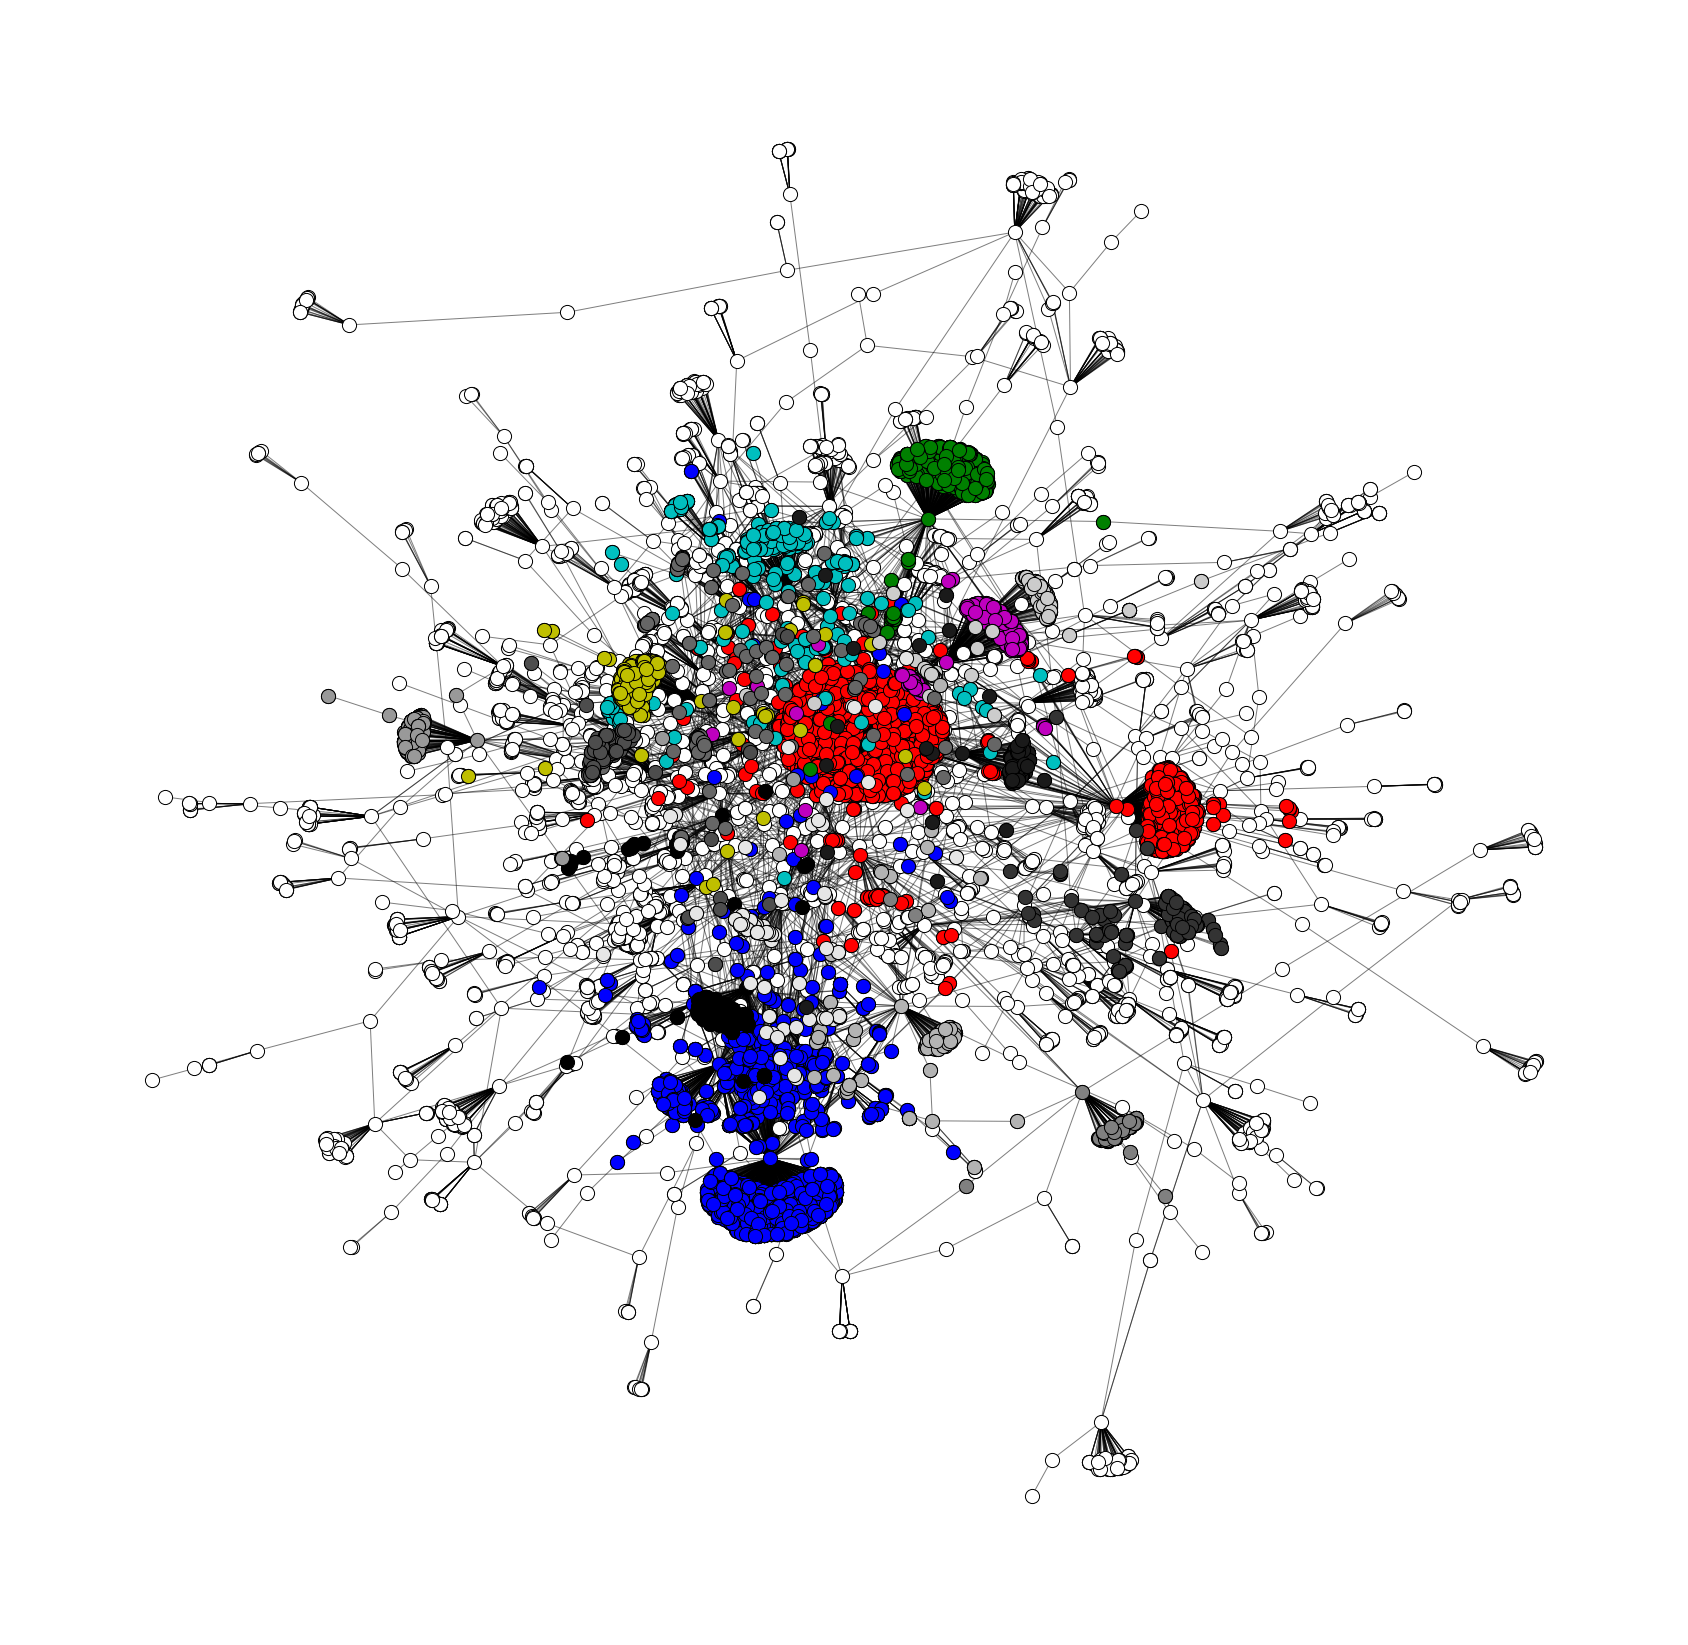

In [249]:
viz.plot_network_clusters(G, walktrap, pos, figsize=(30, 30), plot_labels=False)
#viz.plot_network_clusters(G,louvain, pos) visualizzazione alternativa

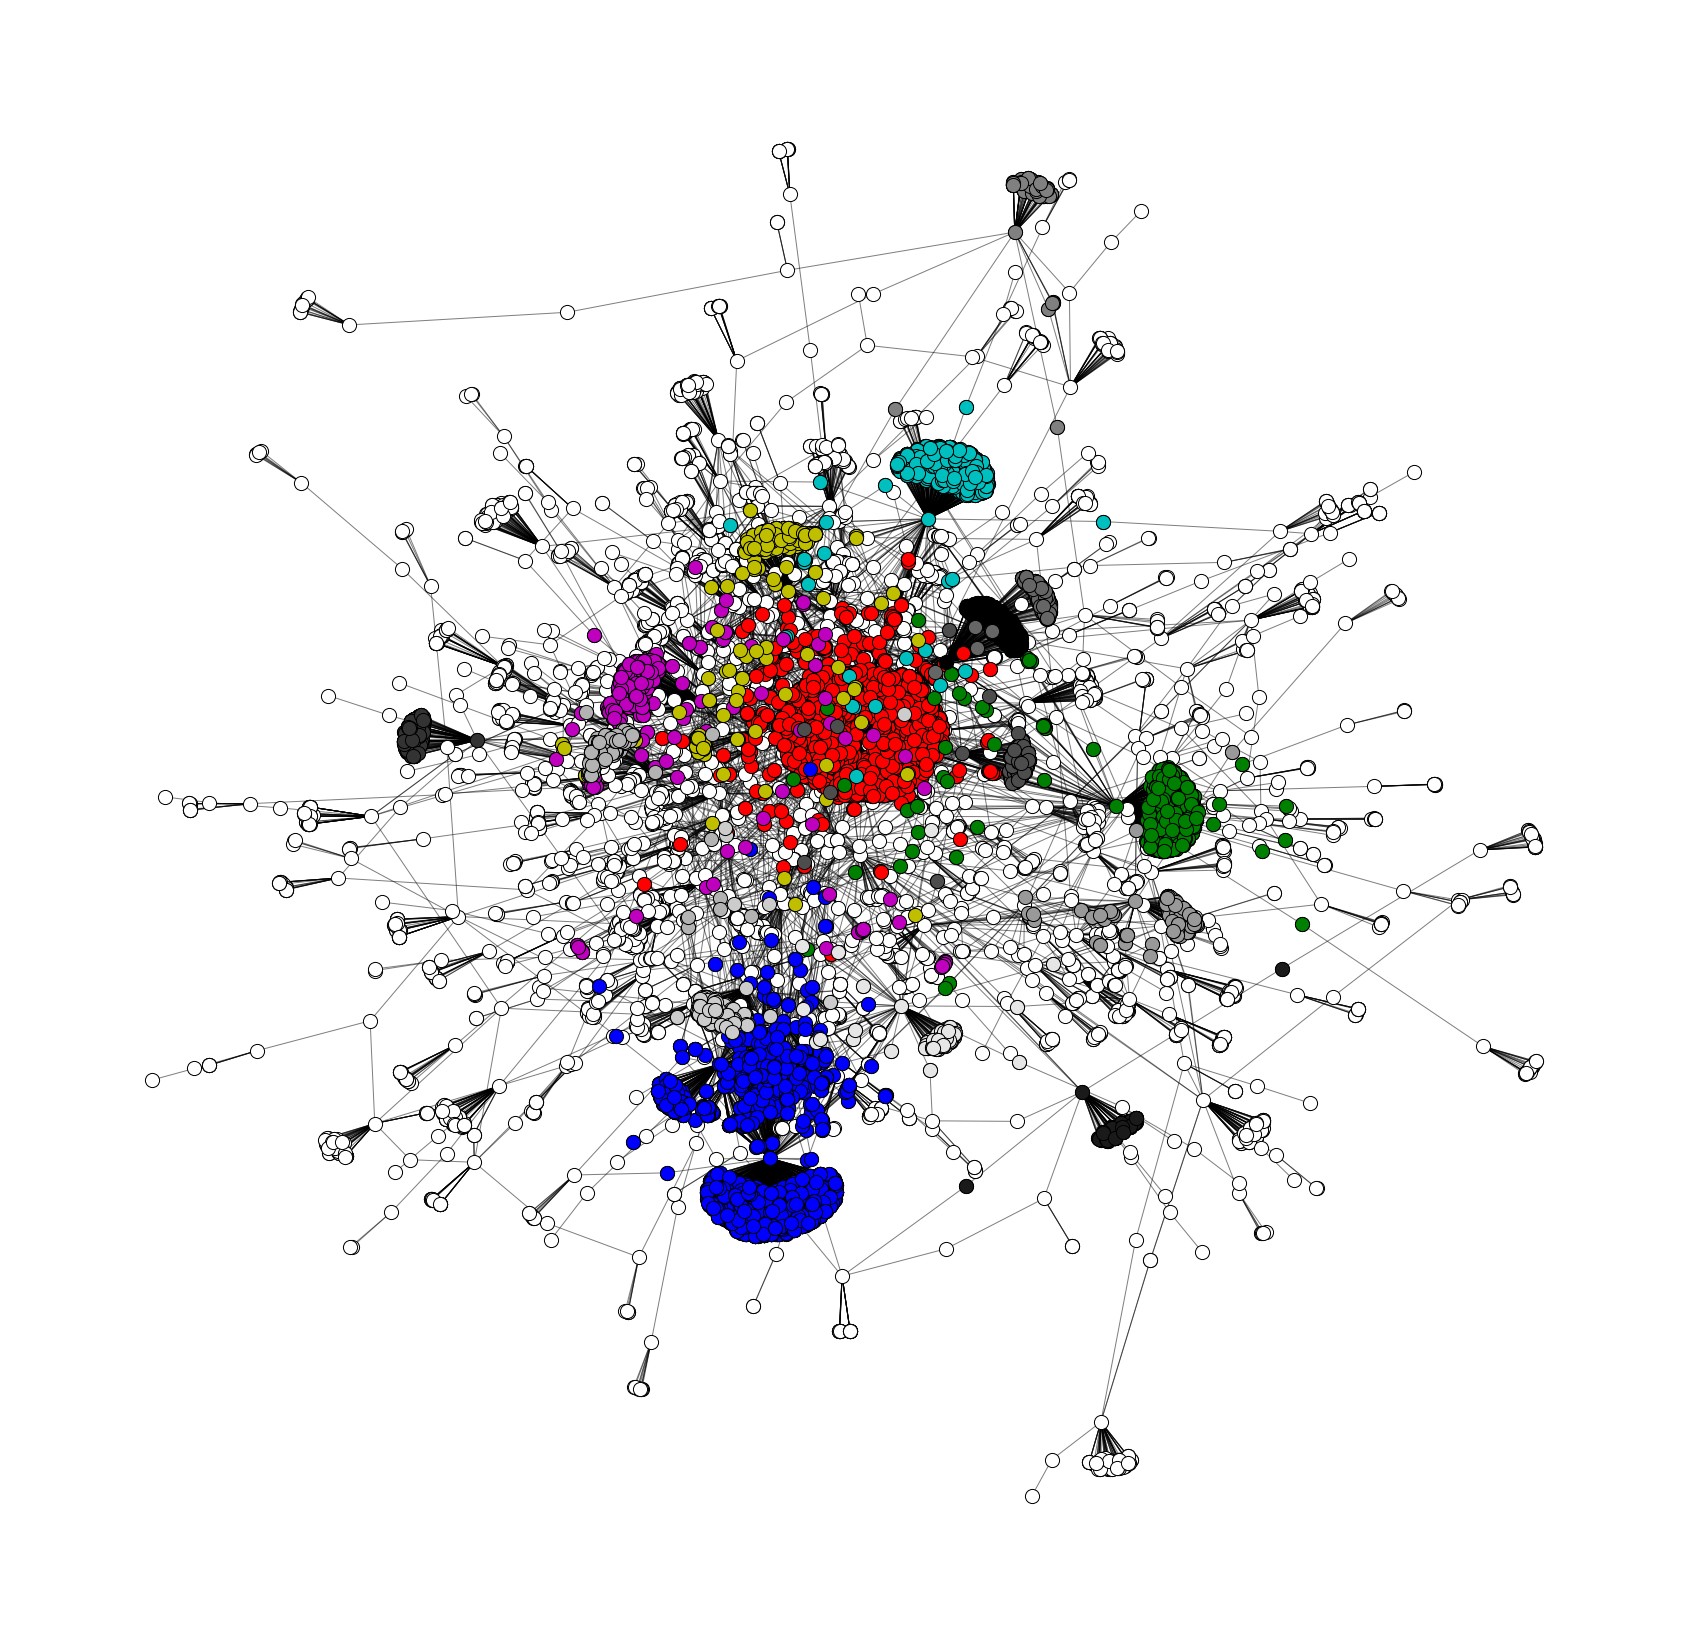

In [248]:
viz.plot_network_clusters(G, label_prop, pos, figsize=(30, 30), plot_labels=False)

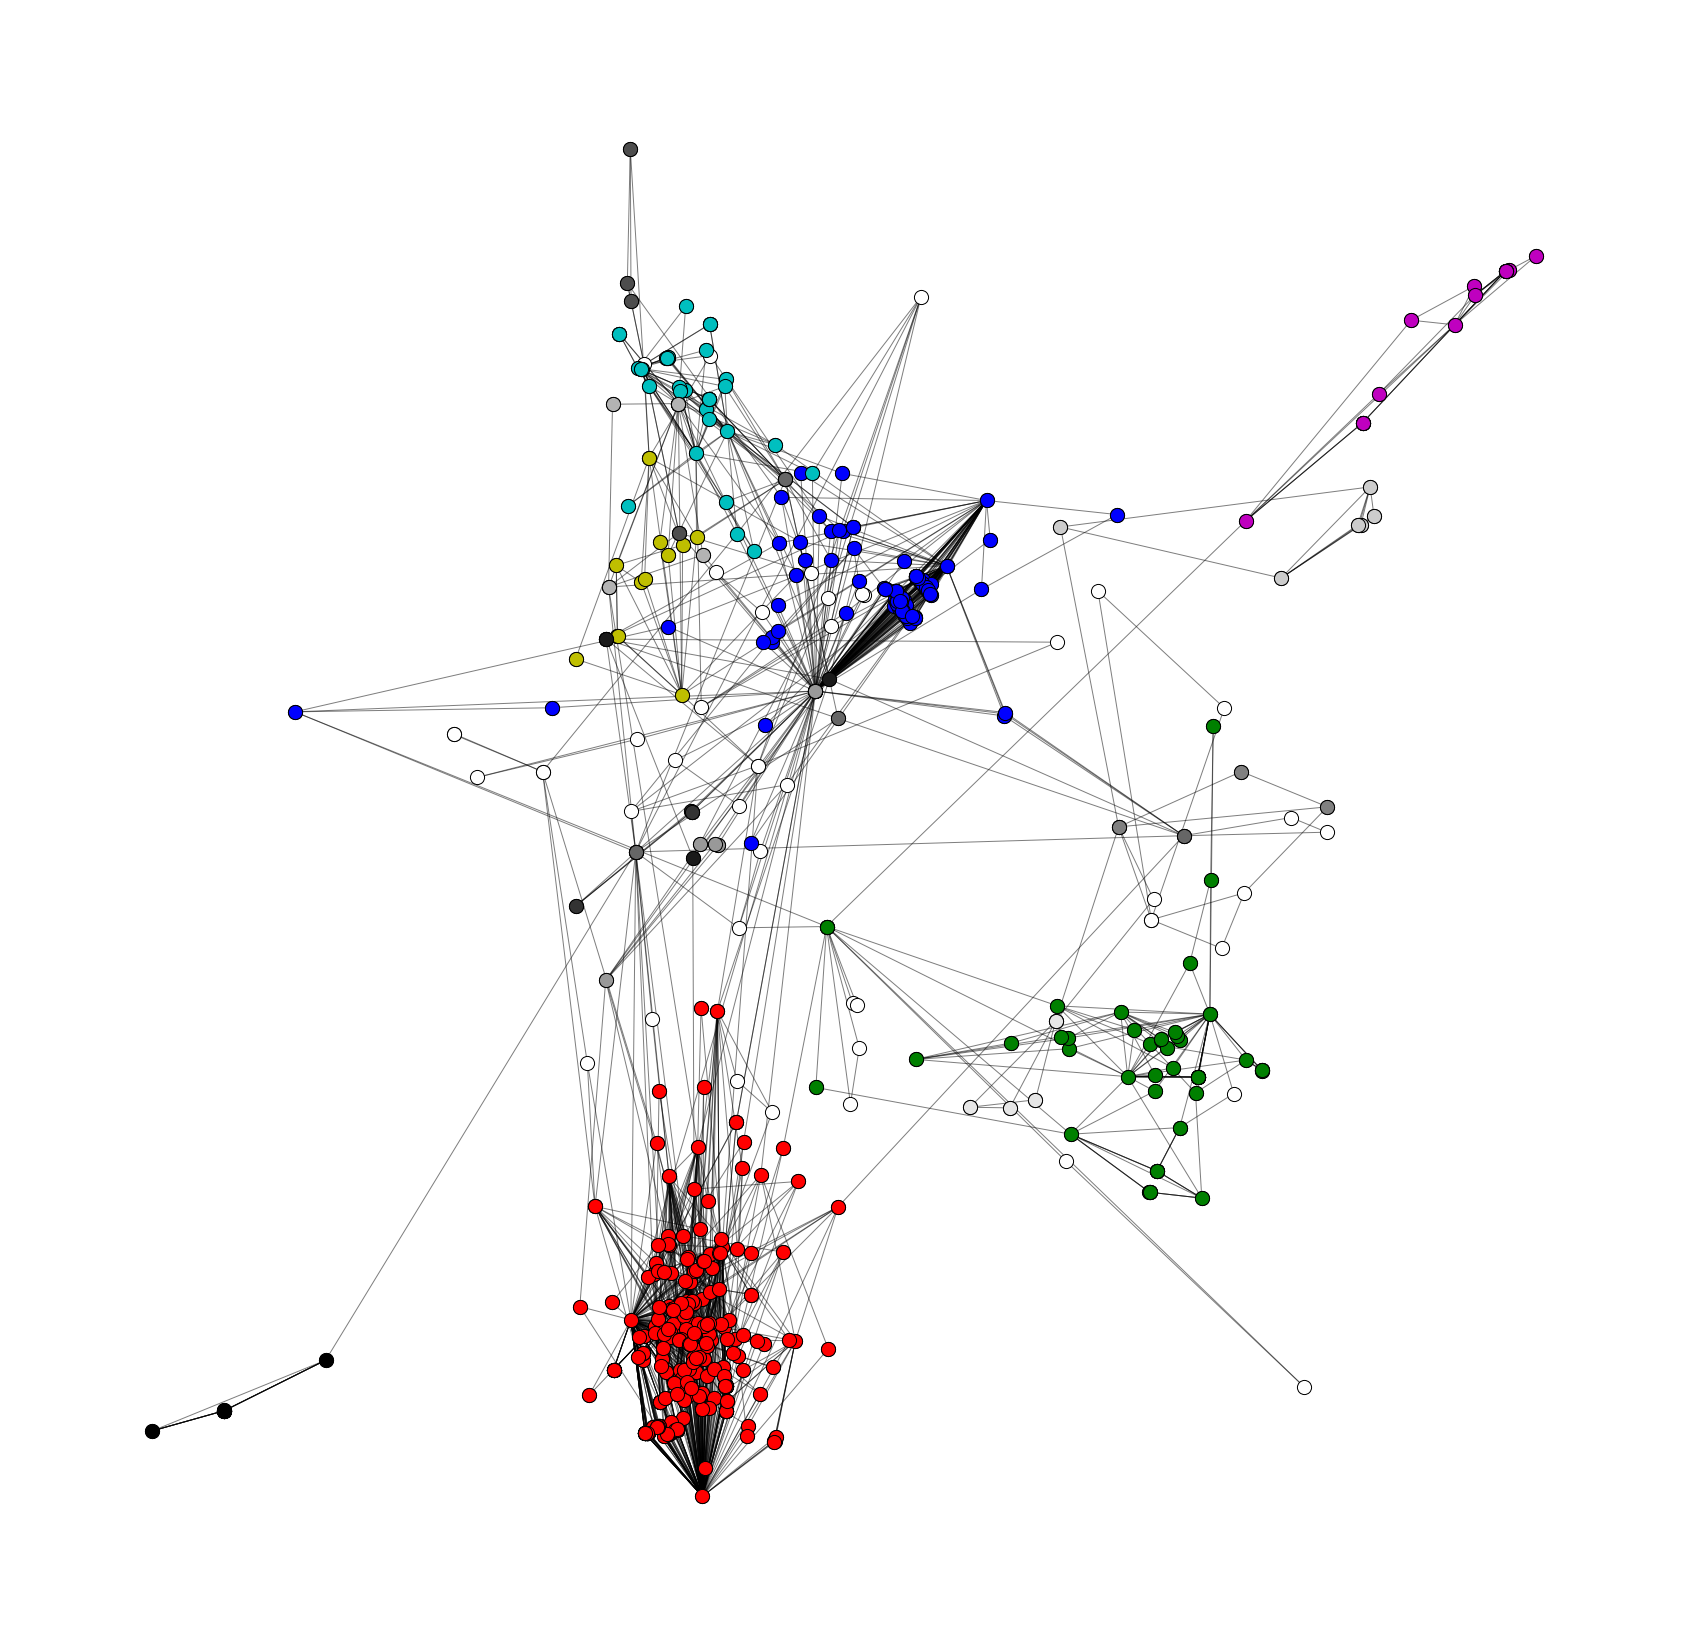

In [250]:
viz.plot_network_clusters(G, k_clique, pos, figsize=(30, 30), plot_labels=False)

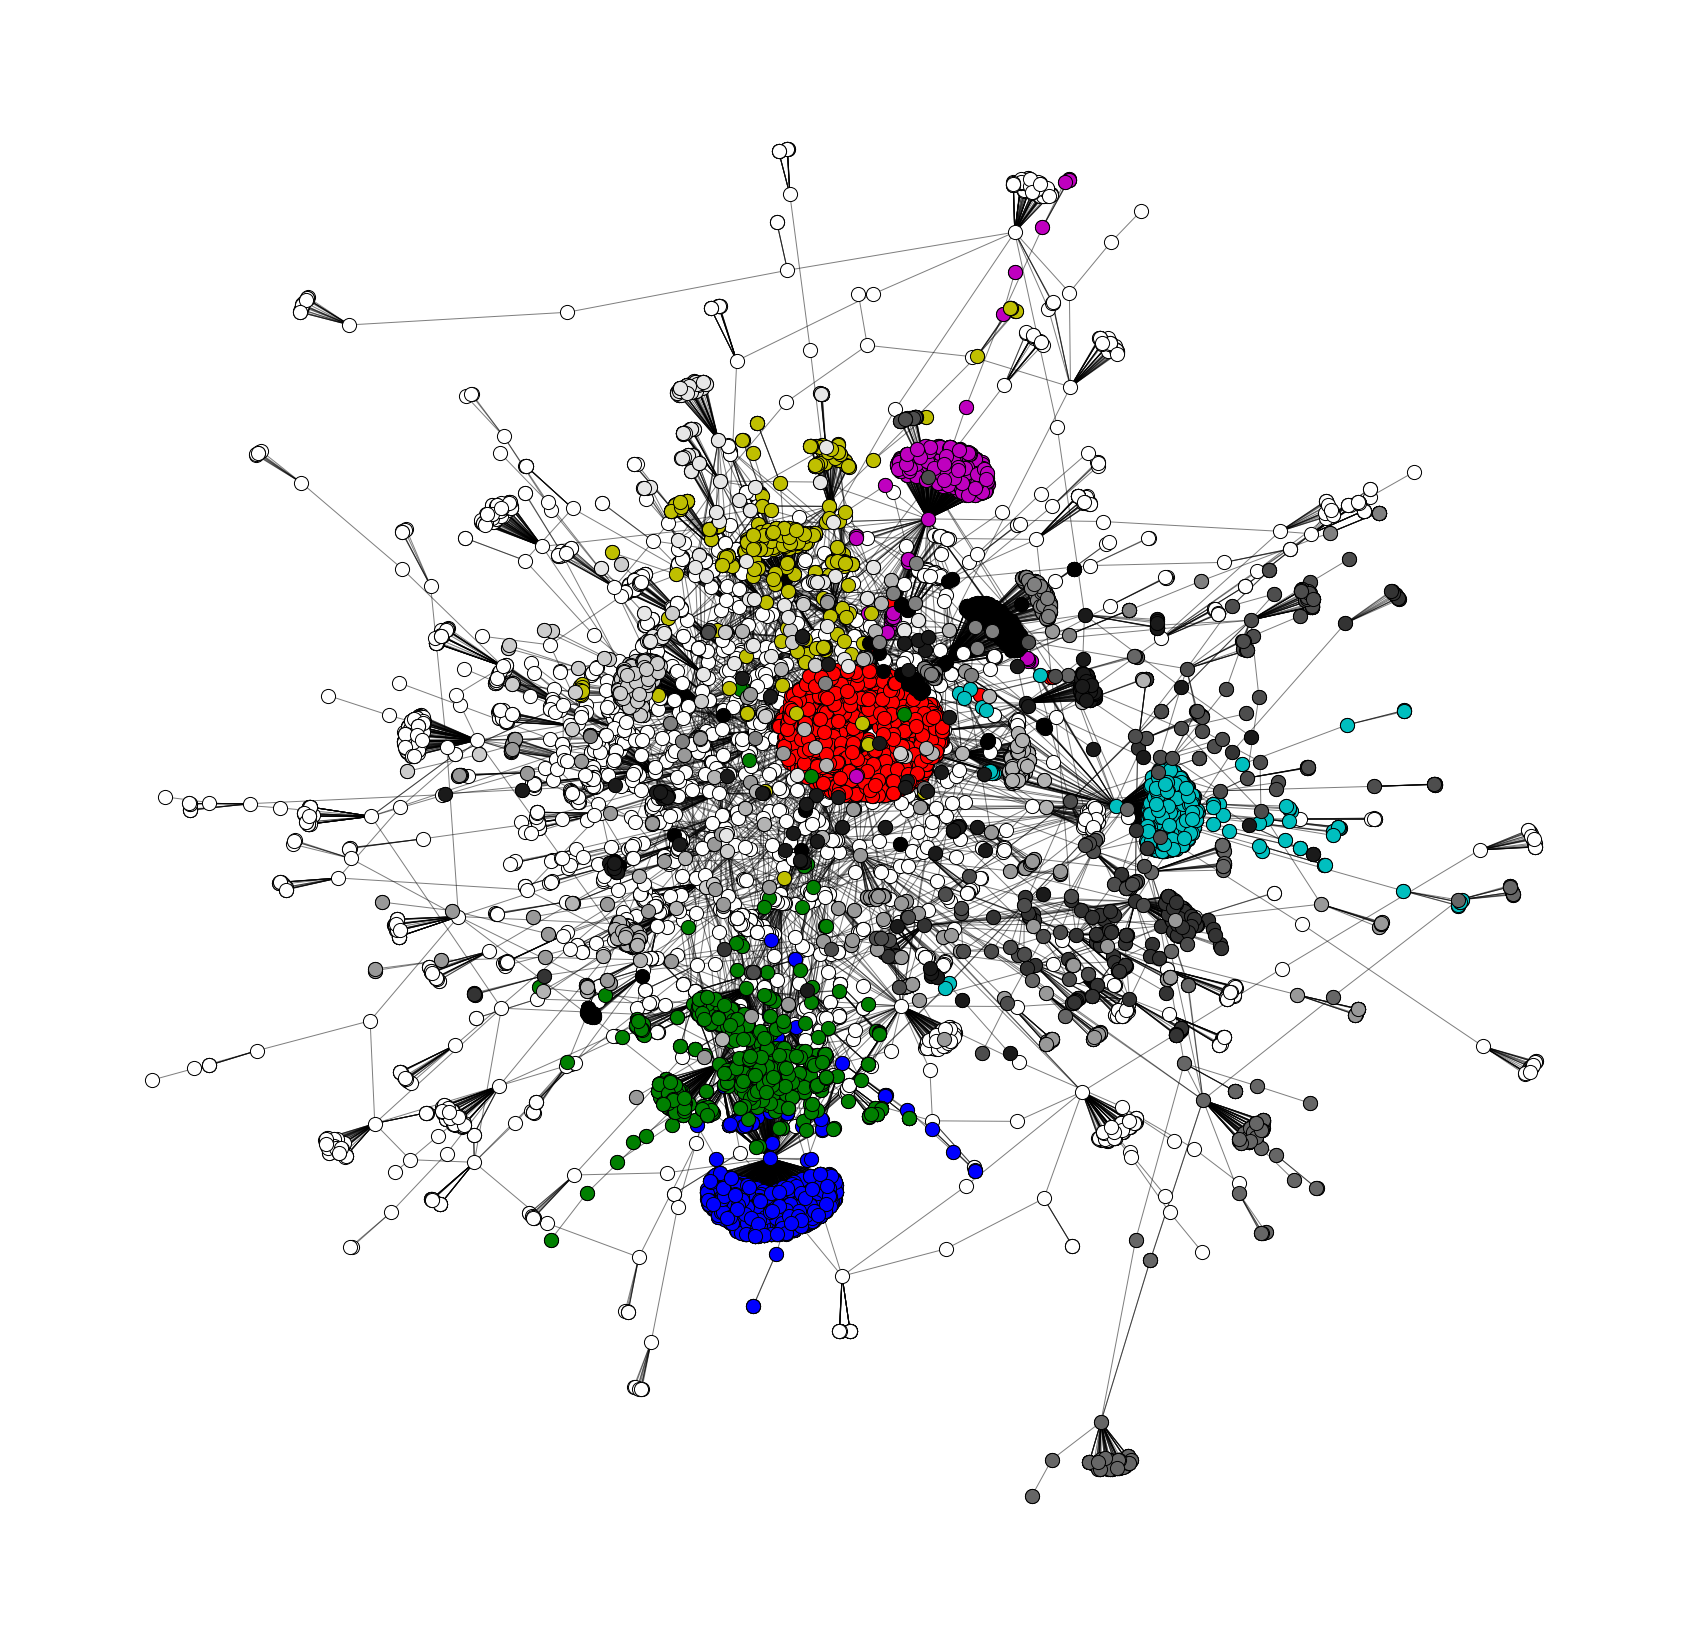

In [251]:
viz.plot_network_clusters(G, louvain,pos, figsize=(30, 30), plot_labels=False)

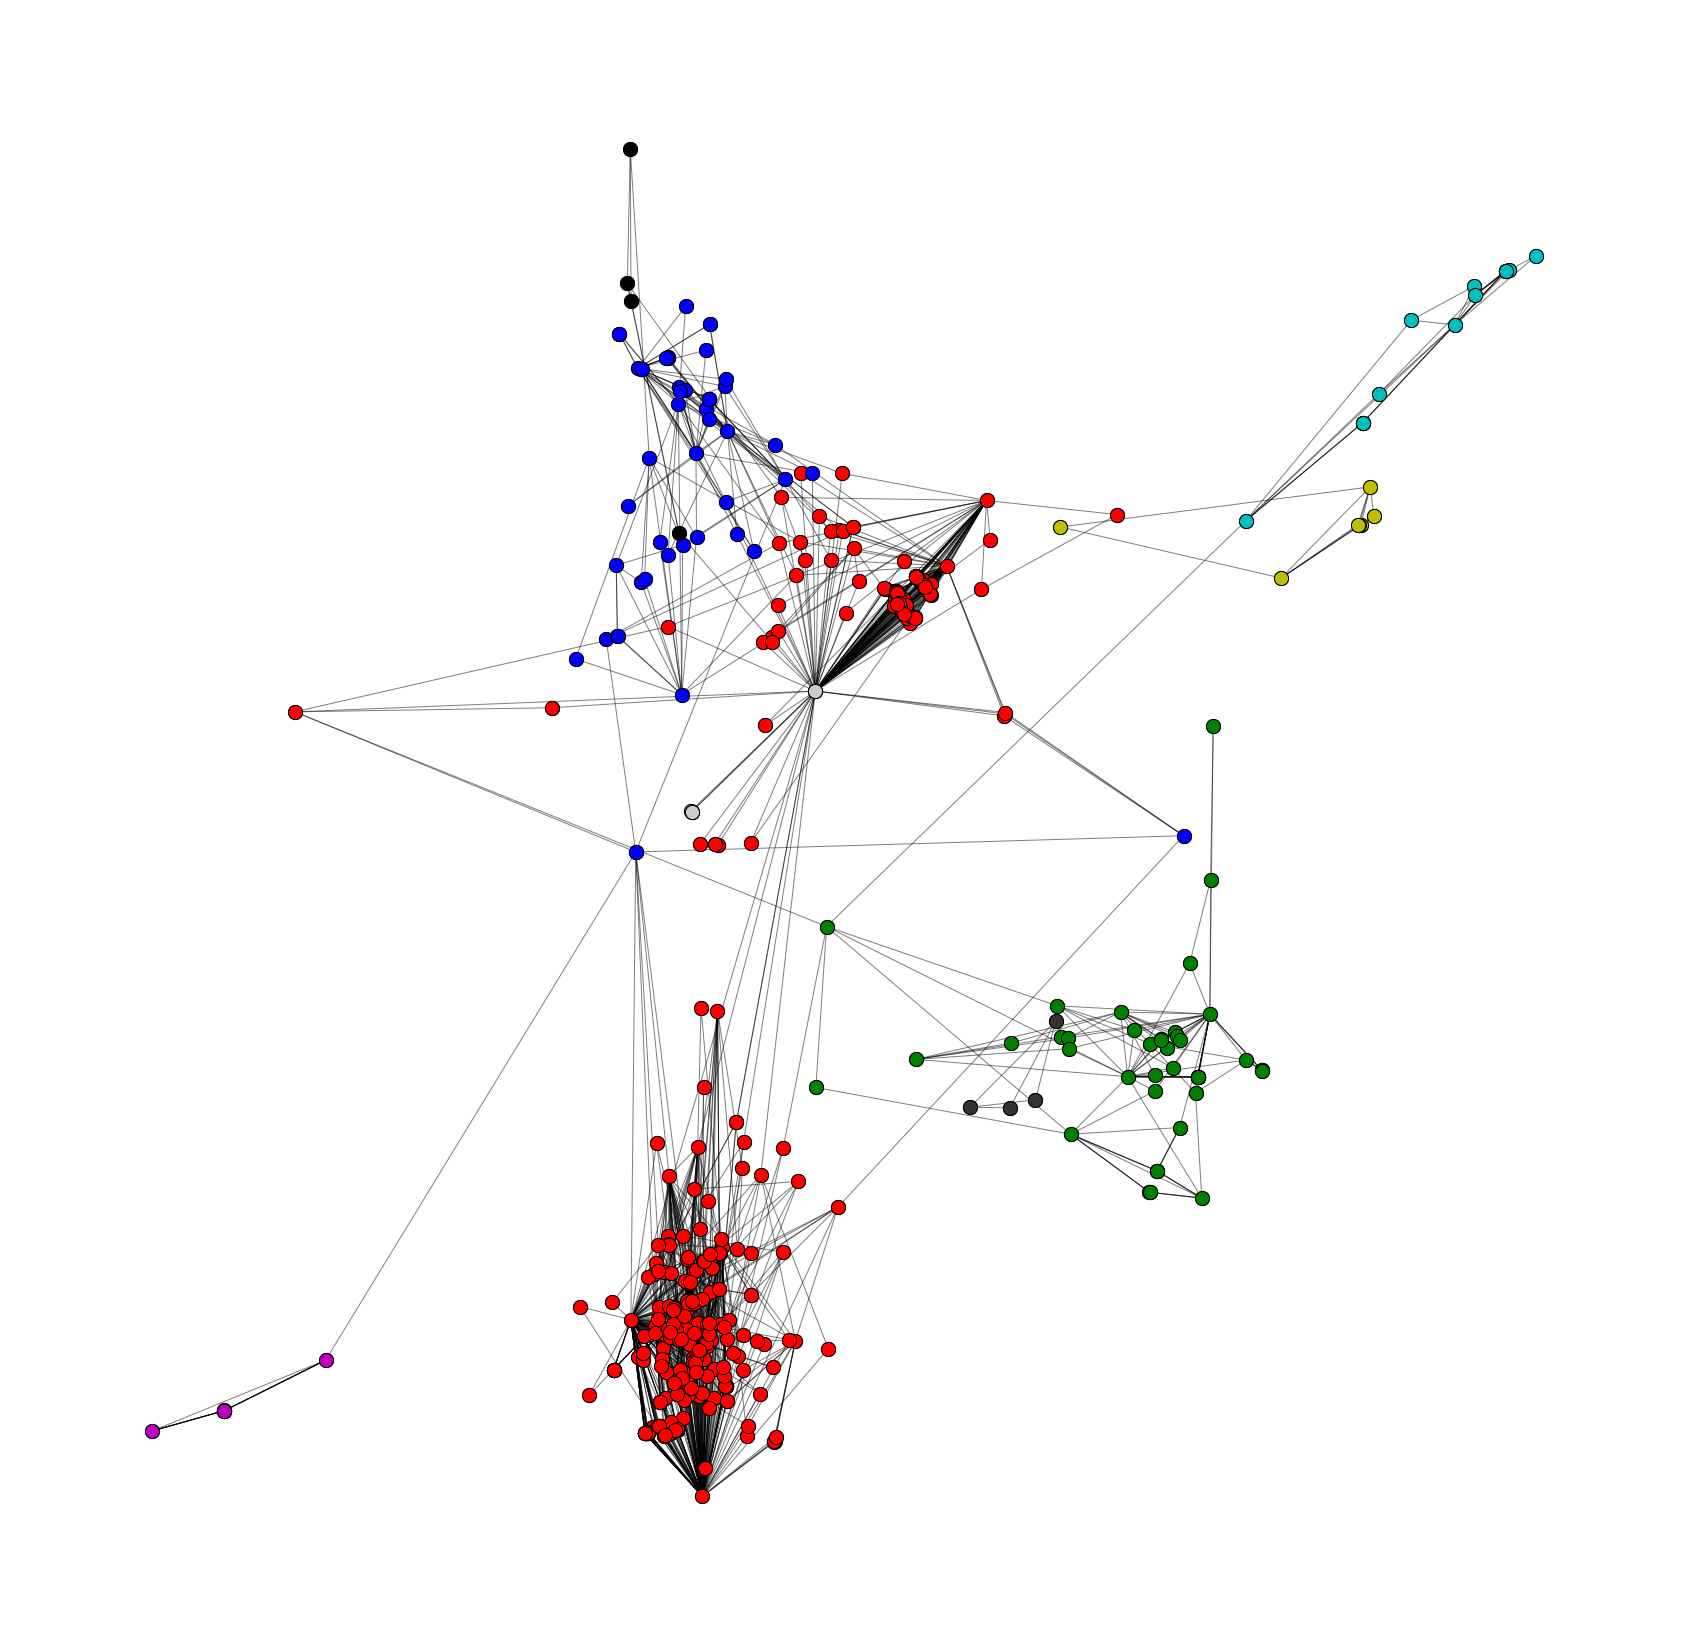

In [252]:
viz.plot_network_clusters(G, angel, pos, figsize=(30, 30), plot_labels=False)

# Community Internal Evaluation

In [54]:
method=[louvain,label_prop,k_clique,angel,walktrap]
name_algo=['Louvain','Label_prop','K_clique','Angel','Walktrap']
n_com=[]
size=[]
AND=[]
IED=[]
mod=[]
cond=[]
type_results=['MIN','MAX','SCORE', 'STD']
for algo in method:
    n_com.append(len(algo.communities))
    size.append(evaluation.size(G,algo, summary=True))
    AND.append(evaluation.average_internal_degree(G,algo, summary=True))
    IED.append(evaluation.internal_edge_density(G,algo, summary=True))
    mod.append(evaluation.link_modularity(G,algo, summary=True))
    cond.append(evaluation.conductance(G,algo, summary=True))

In [38]:
mod

[FitnessResult(min=None, max=None, score=0.130746661974579, std=None),
 FitnessResult(min=None, max=None, score=0.12563362999321367, std=None),
 FitnessResult(min=None, max=None, score=0.015902281661429107, std=None),
 FitnessResult(min=None, max=None, score=0.01582675922042798, std=None),
 FitnessResult(min=None, max=None, score=0.12951361071437179, std=None)]

In [69]:
#for each fitness score, we report only the mean(score) value (verificare!!)
i=0
while i<=len(name_algo)-1:
    print(i,')',name_algo[i])
    print('   numero community', n_com[i])
    #print("size", size[i])
    print('   Average Node Degree: min = {}, max = {}, avg = {} '.format(AND[i][0],AND[i][1], AND[i][2])) 
    print('   Internal Edge Density: min = {}, max = {}, avg = {} '.format(IED[i][0],IED[i][1], IED[i][2]))
    print('   Modularity', mod[i][2])
    print('   Conductance: min = {}, max = {}, avg = {} '.format(cond[i][0],cond[i][1], cond[i][2]))
    i += 1

0 ) Louvain

numero community 51

Average Node Degree: min = 1.5, max = 3.1695906432748537, avg = 2.002730634411045

Internal Edge Density: min = 0.0012217470983506415, max = 0.5, avg = 0.07153514744349114

Modularity 0.130746661974579

Conductance: min = 0.0040650406504065045, max = 0.18501170960187355, avg = 0.0888459132719372

1 ) Label_prop

numero community 360

Average Node Degree: min = 1.0, max = 2.685305591677503, avg = 1.5424331463968877

Internal Edge Density: min = 0.0010378671882724214, max = 1.0, avg = 0.46414691532324376

Modularity 0.12563362999321367

Conductance: min = 0.01694915254237288, max = 0.7777777777777778, avg = 0.25271839126824663

2 ) K_clique

numero community 39

Average Node Degree: min = 2.0, max = 6.326086956521739, avg = 2.533371128561764

Internal Edge Density: min = 0.02300395256916996, max = 1.0, avg = 0.8060605508699155

Modularity 0.015902281661429107

Conductance: min = 0.47368421052631576, max = 0.9969712266532055, avg = 0.8860798530201132

3 ) Angel

numero community 9

Average Node Degree: min = 0.0, max = 5.657957244655582, avg = 2.9649053023162284

Internal Edge Density: min = 0.0, max = 0.8333333333333334, avg = 0.3920451546342283

Modularity 0.01582675922042798

Conductance: min = 0.47368421052631576, max = 1.0, avg = 0.742523339041146

4 ) Walktrap

numero community 222

Average Node Degree: min = 1.0, max = 2.706169822846671, avg = 1.7595904751690146

Internal Edge Density: min = 0.0008907187799008379, max = 1.0, avg = 0.25604545234432247

Modularity 0.12951361071437179

Conductance: min = 0.01694915254237288, max = 0.3333333333333333, avg = 0.1305965009014595

In [61]:
cond

[FitnessResult(min=0.0040650406504065045, max=0.18501170960187355, score=0.0888459132719372, std=0.0515743718463386),
 FitnessResult(min=0.01694915254237288, max=0.7777777777777778, score=0.25271839126824663, std=0.1546307052934704),
 FitnessResult(min=0.47368421052631576, max=0.9969712266532055, score=0.8860798530201132, std=0.13878097026947211),
 FitnessResult(min=0.47368421052631576, max=1.0, score=0.742523339041146, std=0.19358460527464166),
 FitnessResult(min=0.01694915254237288, max=0.3333333333333333, score=0.1305965009014595, std=0.06090488459496982)]

In [81]:
algo=[]
freq_com=[]
size_com=[]
fit_and=[]
fit_ied=[]
fit_mod=[]
fit_cond=[]
for i in range(len(name_algo)):
    algo.append(name_algo[i])
    freq_com.append(n_com[i])
    size_com.append([size[i][2],size[i][3]])
    fit_and.append([AND[i][2],AND[i][3]])
    fit_ied.append([IED[i][2],IED[i][3]])
    fit_mod.append(mod[i][2])
    fit_cond.append([cond[i][2],cond[i][3]])

In [82]:
tab=pd.DataFrame({'': algo,
                 'freq': freq_com,
                  'size':size_com,
                 'Average Node Degree': fit_and,
                  'Internal Edge Density':fit_ied,
                 'Modularity':fit_mod,
                  'Conductance':fit_cond})

tab=tab.set_index('')
tab

freq                                      size  \
                                                             
Louvain       51   [199.68627450980392, 278.6706883701782]   
Label_prop   360   [28.288888888888888, 138.1676312346262]   
K_clique      39   [16.076923076923077, 46.93060048973822]   
Angel          9  [58.888888888888886, 128.63595872283616]   
Walktrap     222  [45.873873873873876, 193.56555409431698]   

                                  Average Node Degree  \
                                                        
Louvain      [2.002730634411045, 0.24884140741812458]   
Label_prop  [1.5424331463968877, 0.36445439729172213]   
K_clique      [2.533371128561764, 0.9416330925782235]   
Angel        [2.9649053023162284, 1.5491098249763338]   
Walktrap    [1.7595904751690146, 0.24074652523471135]   

                                 Internal Edge Density  Modularity  \
                                                                     
Louvain      [0.07153514744349114, 0.1319005179528583]    0.130747   
Label_prop   [0.46414691532324376, 0.3539179415049402]    0.125634   
K_clique     [0.8060605508699155, 0.31591746383028724]    0.015902   
Angel         [0.3920451546342283, 0.3022969603496598]    0.015827   
Walktrap    [0.25604545234432247, 0.21203013189974337]    0.129514   

                                          Conductance  
                                                       
Louvain      [0.0888459132719372, 0.0515743718463386]  
Label_prop  [0.25271839126824663, 0.1546307052934704]  
K_clique    [0.8860798530201132, 0.13878097026947211]  
Angel        [0.742523339041146, 0.19358460527464166]  
Walktrap    [0.1305965009014595, 0.06090488459496982]

### Community fitness/comparison visualization

<Figure size 3600x3600 with 0 Axes>

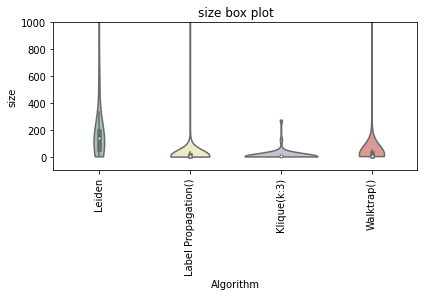

<Figure size 3600x3600 with 0 Axes>

In [85]:
viz.plot_com_stat([louvain, label_prop,k_clique, walktrap], evaluation.size)
plt.title('size box plot')
plt.ylim([-100,1000])
plt.figure(figsize=(50,50))


<AxesSubplot:xlabel='Algorithm', ylabel='average_internal_degree'>

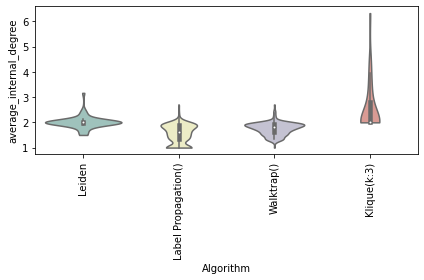

In [241]:
viz.plot_com_stat([louvain, label_prop, walktrap, k_clique], evaluation.average_internal_degree)

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

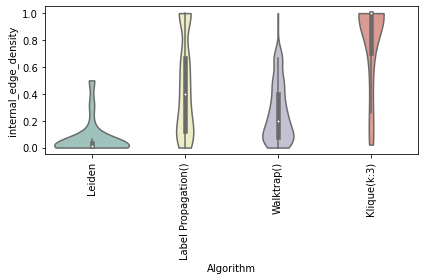

In [243]:
viz.plot_com_stat([louvain, label_prop, walktrap, k_clique], evaluation.internal_edge_density)

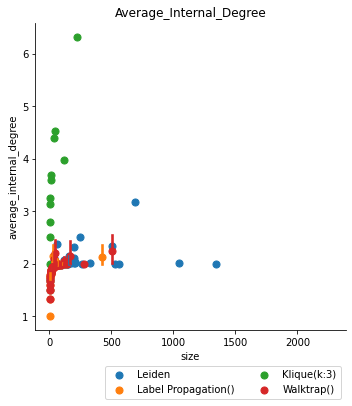

In [244]:
ax=viz.plot_com_properties_relation([louvain, label_prop, k_clique, walktrap], evaluation.size, evaluation.average_internal_degree) 
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

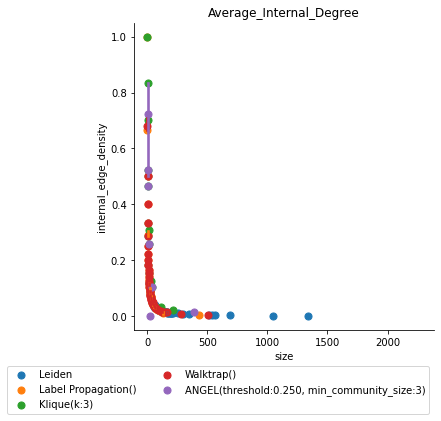

In [88]:
viz.plot_com_properties_relation([louvain, label_prop,k_clique, walktrap, angel], evaluation.size, evaluation.internal_edge_density)
plt.title('Average_Internal_Degree')
plt.legend(bbox_to_anchor =(1, -0.10), ncol = 2)

# Partition Comparison

### NMI

In [217]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.797814241942518, std=None)

In [220]:
evaluation.normalized_mutual_information(louvain, walktrap)

MatchingResult(score=0.8201515093737185, std=None)

In [221]:
evaluation.normalized_mutual_information(label_prop, walktrap)

MatchingResult(score=0.8682980545696777, std=None)

### NF1

In [223]:
evaluation.nf1(label_prop,louvain)

MatchingResult(score=0.025430246913580246, std=None)

In [224]:
evaluation.nf1(label_prop,angel)

MatchingResult(score=0.0016828110161443495, std=None)

In [225]:
evaluation.nf1(label_prop,k_clique)

MatchingResult(score=0.0115208467359005, std=None)

In [226]:
evaluation.nf1(label_prop,walktrap)

MatchingResult(score=0.33371710147647643, std=None)

In [227]:
evaluation.nf1(louvain,angel)

MatchingResult(score=0.008778604907637166, std=None)

In [228]:
evaluation.nf1(louvain,k_clique)

MatchingResult(score=0.027049926035502964, std=None)

In [230]:
evaluation.nf1(louvain,walktrap)

MatchingResult(score=0.1433935710858788, std=None)

In [231]:
evaluation.nf1(k_clique,angel)

MatchingResult(score=0.16366863905325443, std=None)

In [232]:
evaluation.nf1(k_clique,walktrap)

MatchingResult(score=0.007687788122570731, std=None)

In [233]:
evaluation.nf1(walktrap,angel)

MatchingResult(score=0.0030585424133811228, std=None)

# Ground Truth (External) evaluation

In [ ]:
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

<AxesSubplot:xlabel='graph', ylabel='score'>

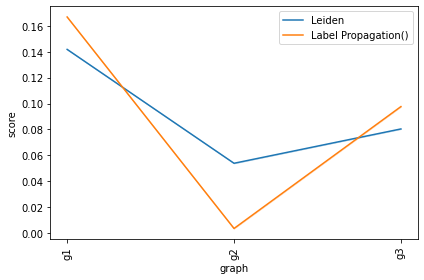

In [ ]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<AxesSubplot:xlabel='graph', ylabel='score'>

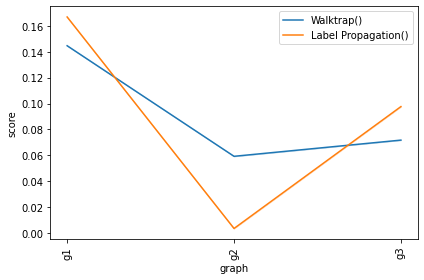

In [ ]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.walktrap, algorithms.label_propagation]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

<AxesSubplot:xlabel='graph', ylabel='score'>

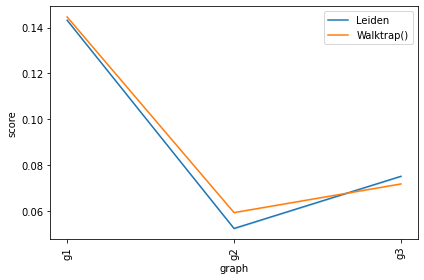

In [ ]:
# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.walktrap]
# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

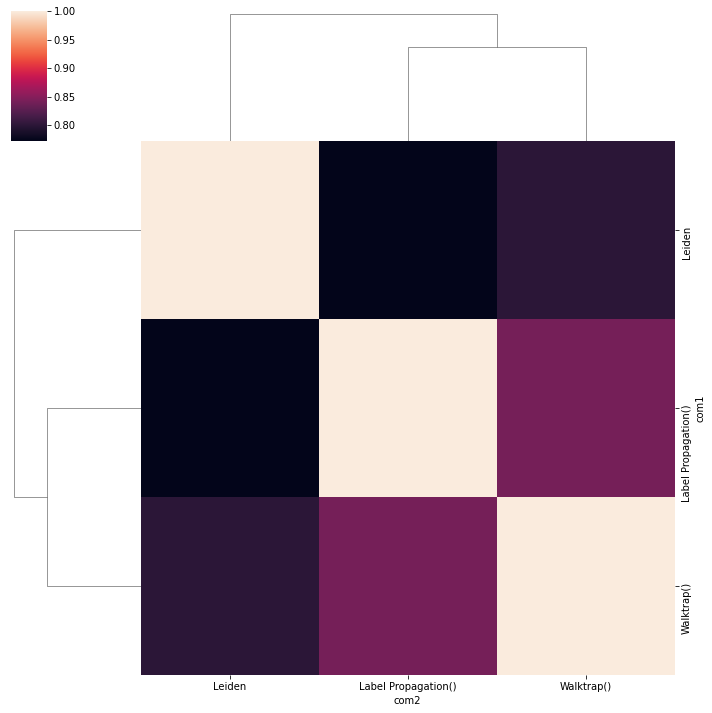

In [89]:
lp_coms = algorithms.label_propagation(G)
leiden_coms = algorithms.leiden(G)
wp_coms = algorithms.walktrap(G)
#girvan_newman = algorithms.girvan_newman(G,level=3)
eig=algorithms.eigenvector(G)

viz.plot_sim_matrix([leiden_coms, lp_coms, wp_coms],evaluation.adjusted_mutual_information)